# CSC294-082 Project (MLP part)
#### Author: Xinyi Ji

In [1]:
# multi-class classification with Keras
import pandas
import numpy as np
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from keras.utils.vis_utils import plot_model

In [2]:
# load dataset
dataframe = pandas.read_csv("data_mlp.csv")
dataset = dataframe.values
dataset.shape

(3370, 513)

In [3]:
X = dataset[:,0:512].astype(np.float64)
#X = np.around(X, decimals=1)
Y = dataset[:,512]
#Y = np.random.randint(2, size=3370)

In [4]:
# encode class values as integers
encoder = LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)
# convert integers to dummy variables (i.e. one hot encoded)
dummy_y = np_utils.to_categorical(encoded_Y)

In [5]:
dummy_y.shape

(3370, 23)

In [6]:
X_train = X[:1350]
Y_train = dummy_y[:1350]

In [7]:
Y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [8]:
X_train

array([[ 0.8566797 , -0.09067627,  2.1675096 , ..., -0.02354876,
        -0.42005473,  2.2905538 ],
       [ 1.3376818 ,  0.29317108, -0.50810033, ...,  0.724914  ,
         1.153408  ,  2.4276733 ],
       [ 0.42092505, -0.76437867,  0.19995171, ..., -0.41374078,
         1.9166131 ,  0.8479354 ],
       ...,
       [ 1.8689815 ,  0.69932663,  2.5440888 , ...,  0.1756024 ,
         0.525333  ,  0.02431944],
       [ 0.26733002,  0.14383799,  0.6691898 , ..., -1.4358457 ,
         0.11629669, -1.3332714 ],
       [ 0.22127318,  0.00877387,  0.50643474, ..., -1.5907007 ,
         0.08781882, -1.3661705 ]])

In [9]:
X_val = X[2700: 2700+370]
Y_val = dummy_y[2700: 2700+370]

In [10]:
X_test = X[2700+370:]
Y_test = dummy_y[2700+370:]

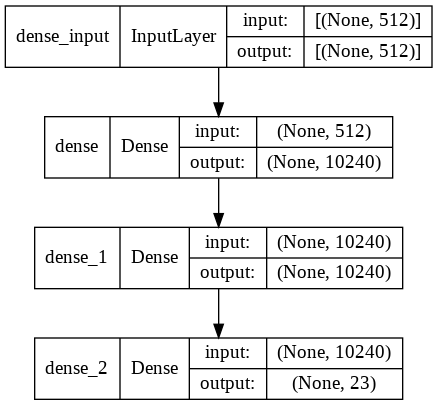

In [11]:
# define baseline model

# create model
model = Sequential()
model.add(Dense(10240, input_dim=512, activation='relu'))
model.add(Dense(10240, input_dim=10240, activation='relu'))
model.add(Dense(23, activation='softmax'))
# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [12]:
history = model.fit(X_train,Y_train, validation_data=(X_val, Y_val), epochs=200, batch_size=10)

Epoch 1/200
135/135 [==============================] - 118s 854ms/step - loss: 3.8856 - accuracy: 0.0570 - val_loss: 3.1483 - val_accuracy: 0.0595
Epoch 2/200
135/135 [==============================] - 114s 844ms/step - loss: 3.1466 - accuracy: 0.0689 - val_loss: 3.1170 - val_accuracy: 0.0730
Epoch 3/200
135/135 [==============================] - 111s 825ms/step - loss: 3.1259 - accuracy: 0.0689 - val_loss: 3.1024 - val_accuracy: 0.0865
Epoch 4/200
135/135 [==============================] - 112s 828ms/step - loss: 3.1049 - accuracy: 0.0674 - val_loss: 3.0858 - val_accuracy: 0.0811
Epoch 5/200
135/135 [==============================] - 112s 827ms/step - loss: 3.0987 - accuracy: 0.0652 - val_loss: 3.0969 - val_accuracy: 0.0892
Epoch 6/200
135/135 [==============================] - 111s 823ms/step - loss: 3.0911 - accuracy: 0.0652 - val_loss: 3.1144 - val_accuracy: 0.0946
Epoch 7/200
135/135 [==============================] - 116s 860ms/step - loss: 3.0861 - accuracy: 0.0778 - val_loss: 3

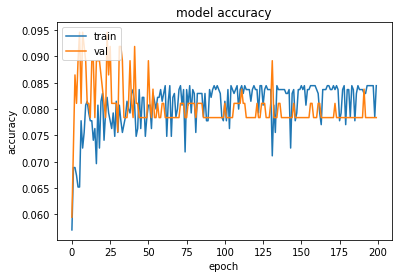

In [13]:
from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [14]:
model.evaluate(X_train, Y_train)

43/43 [==============================] - 9s 195ms/step - loss: 3.0474 - accuracy: 0.0844


[3.0473973751068115, 0.08444444090127945]